In [1]:
#모듈 임포트
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib.patheffects as pe

from matplotlib import rc
import matplotlib.font_manager as fm

In [ ]:
#현재 컴퓨터에 설치된 글꼴의 폰트 패밀리 확인하기
[f.name for f in fm.fontManager.ttflist]

In [3]:
#폰트 지정 방법1
plt.rc('font', family="Malgun Gothic")
mpl.rcParams['axes.unicode_minus'] = False #마이너스 기호 처리

In [4]:
#폰트 지정 방법2
font_path = "C:/Windows/Fonts/malgun.ttf"

font = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font)
mpl.rcParams['axes.unicode_minus'] = False #마이너스 기호 처리

In [5]:
column_names = ["X격자", "Y격자", "위도", "경도", "연도", "월", "일", "시", "계약전력합계", "공동주택수", "전력부하합계", "기온", "상대습도", "풍속"]

df2020 = pd.read_csv("Data/2020.csv", encoding='utf-8', names=column_names, header=None)
df2021 = pd.read_csv("Data/2021.csv", encoding='utf-8', names=column_names, header=None)
df2022 = pd.read_csv("Data/2022.csv", encoding='utf-8', names=column_names, header=None)

In [6]:
df2020.size, df2021.size, df2022.size

(14680050, 14680050, 14680050)

### 2020년 EDA

In [7]:
df2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   X격자     1048575 non-null  int64  
 1   Y격자     1048575 non-null  int64  
 2   위도      1048575 non-null  float64
 3   경도      1048575 non-null  float64
 4   연도      1048575 non-null  int64  
 5   월       1048575 non-null  int64  
 6   일       1048575 non-null  int64  
 7   시       1048575 non-null  int64  
 8   계약전력합계  1048575 non-null  int64  
 9   공동주택수   1048575 non-null  int64  
 10  전력부하합계  1048575 non-null  float64
 11  기온      1038103 non-null  float64
 12  상대습도    894837 non-null   float64
 13  풍속      1036393 non-null  float64
dtypes: float64(6), int64(8)
memory usage: 112.0 MB


In [8]:
df2020.describe()

,X격자,Y격자,위도,경도,연도,월,일,시,계약전력합계,공동주택수,전력부하합계,기온,상대습도,풍속
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.038103e+06,894837.000000,1.036393e+06
mean,8.256250e+01,8.312855e+01,3.553781e+01,1.282299e+02,2020.0,6.501993e+00,1.575384e+01,1.249994e+01,4.916569e+04,3.413438e+01,7.446365e+03,1.416818e+01,68.194073,1.822140e+00
std,1.500624e+01,9.411175e+00,4.345462e-01,8.439014e-01,0.0,3.452920e+00,8.811318e+00,6.922181e+00,4.240419e+04,2.996843e+01,6.425528e+03,9.232073e+00,21.846289,1.400623e+00
min,5.400000e+01,6.800000e+01,3.484218e+01,1.266279e+02,2020.0,1.000000e+00,1.000000e+00,1.000000e+00,6.750000e+03,1.000000e+01,4.697200e+02,-1.710000e+01,1.000000,0.000000e+00
25%,6.700000e+01,7.500000e+01,3.517055e+01,1.273688e+02,2020.0,4.000000e+00,8.000000e+00,6.000000e+00,1.967400e+04,1.400000e+01,2.980600e+03,6.800000e+00,52.000000,8.000000e-01
50%,8.800000e+01,8.000000e+01,3.537242e+01,1.285478e+02,2020.0,7.000000e+00,1.600000e+01,1.200000e+01,3.390000e+04,2.300000e+01,5.070640e+03,1.460000e+01,70.000000,1.500000e+00
75%,9.500000e+01,9.100000e+01,3.589336e+01,1.289190e+02,2020.0,1.000000e+01,2.300000e+01,1.800000e+01,6.528100e+04,4.500000e+01,1.006002e+04,2.180000e+01,87.200000,2.600000e+00
max,1.020000e+02,1.000000e+02,3.633936e+01,1.293562e+02,2020.0,1.200000e+01,3.100000e+01,2.400000e+01,2.328430e+05,1.940000e+02,7.644092e+04,3.760000e+01,100.000000,3.300000e+01


In [9]:
df2020.head()

,X격자,Y격자,위도,경도,연도,월,일,시,계약전력합계,공동주택수,전력부하합계,기온,상대습도,풍속
0,86,68,34.84357,128.398978,2020,1,1,1,15750,25,2957.40,-2.5,36.0,1.9
1,86,68,34.84357,128.398978,2020,1,1,2,15750,25,2666.04,-2.4,30.0,5.0
2,86,68,34.84357,128.398978,2020,1,1,3,15750,25,2475.04,-2.9,32.0,2.7
3,86,68,34.84357,128.398978,2020,1,1,4,15750,25,2349.44,-2.8,30.0,3.7
4,86,68,34.84357,128.398978,2020,1,1,5,15750,25,2319.48,-2.7,30.0,2.9


### [boxplot]

Text(0.5, 0, '계약전력합계')

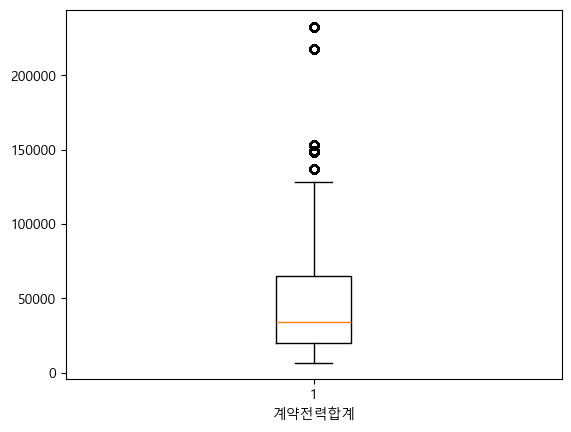

In [10]:
plt.boxplot(df2020.iloc[:, 8])
plt.xlabel("계약전력합계")

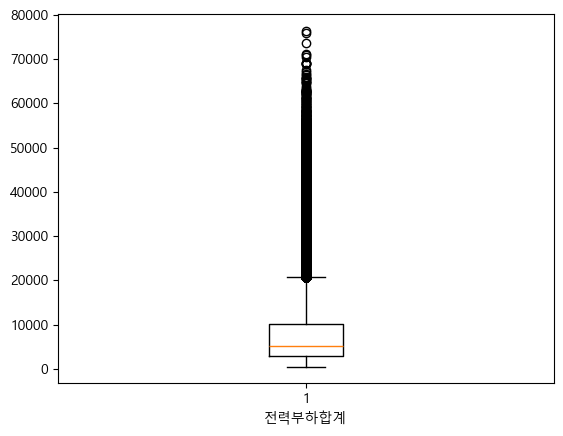

In [11]:
plt.boxplot(df2020.iloc[:, 10])
plt.xlabel("전력부하합계")
plt.show()

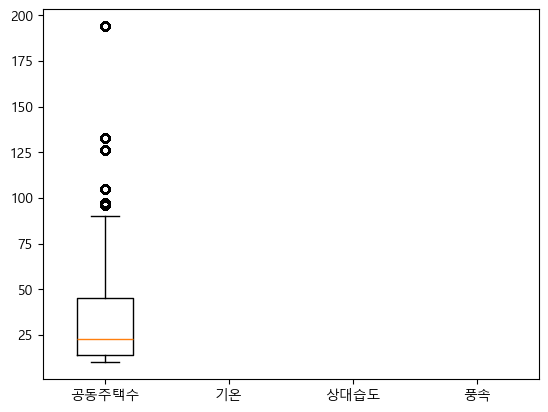

In [12]:
idx = np.arange(1, 5)
labels = ['공동주택수', '기온', '상대습도', '풍속']

plt.boxplot([df2020['공동주택수'], df2020['기온'], df2020['상대습도'], df2020['풍속']])
plt.xticks(idx, labels)
plt.show()

Text(0, 0.5, '전력부하합계')

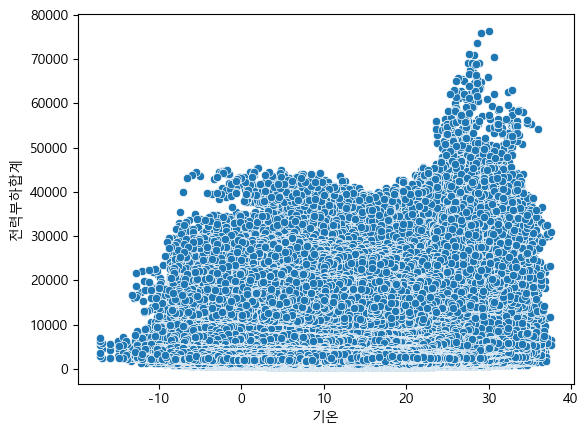

In [17]:
data = pd.DataFrame({'x': df2020['기온'], 'y': df2020['전력부하합계']})
sns.scatterplot(data=data, x='x', y='y')
plt.xlabel("기온")
plt.ylabel("전력부하합계")

### [상관관계 분석]

In [23]:
data = pd.DataFrame({'기온': df2020['기온'], '전력부하합계': df2020['전력부하합계']})
correlation_matrix = data.corr()
print(correlation_matrix)

              기온    전력부하합계
기온      1.000000  0.084645
전력부하합계  0.084645  1.000000


In [22]:
data = pd.DataFrame({'상대습도': df2020['상대습도'], '전력부하합계': df2020['전력부하합계']})
correlation_matrix = data.corr()
print(correlation_matrix)

            상대습도    전력부하합계
상대습도    1.000000 -0.028772
전력부하합계 -0.028772  1.000000


In [21]:
data = pd.DataFrame({'풍속': df2020['풍속'], '전력부하합계': df2020['전력부하합계']})
correlation_matrix = data.corr()
print(correlation_matrix)

              풍속    전력부하합계
풍속      1.000000  0.001368
전력부하합계  0.001368  1.000000


In [24]:
data = pd.DataFrame({'시': df2020['시'], '전력부하합계': df2020['전력부하합계']})
correlation_matrix = data.corr()
print(correlation_matrix)

               시    전력부하합계
시       1.000000  0.185786
전력부하합계  0.185786  1.000000
